# HW2 Q2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio  
import scipy.ndimage as ndi
from skimage.util import img_as_ubyte
from skimage import color
import cv2
import math

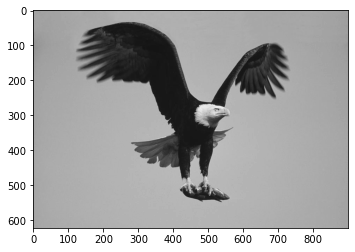

In [2]:
# Read and display image
img = imageio.imread('Eagle.jpg')
img_gray = img_as_ubyte(color.rgb2gray(img))
plt.imshow(img_gray,cmap='gray')

**a) Compute the first partial derivatives of the image in the 𝑥 and 𝑦 directions using Sobel operator. Using these derivatives, compute the gradient magnitude of the image. Show how thresholding can affect the gradient image.**

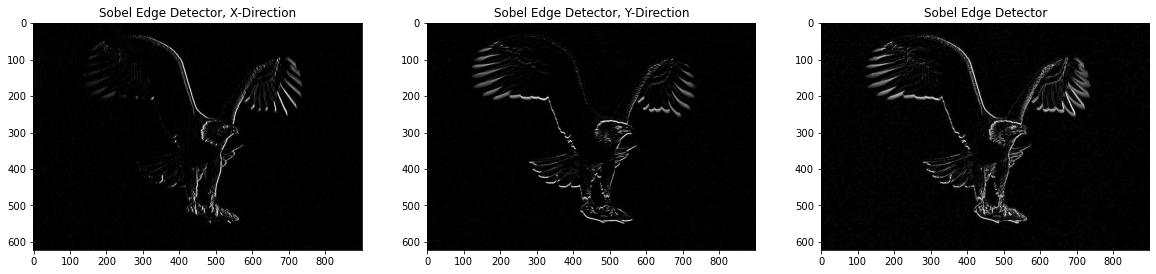

In [3]:
fig = plt.figure(figsize=(20,20), frameon=False)
ax1 = fig.add_subplot(131)  
ax2 = fig.add_subplot(132)  
ax3 = fig.add_subplot(133)  

m,n = img_gray.shape
x_mask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
y_mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

fx = cv2.filter2D(img_gray, -1, x_mask).astype(np.uint8)
fy = cv2.filter2D(img_gray, -1, y_mask).astype(np.uint8)
f = (fx+fy)

ax1.imshow(fx,cmap='gray')
ax2.imshow(fy, cmap='gray')
ax3.imshow(f,cmap='gray')

ax1.title.set_text('Sobel Edge Detector, X-Direction')
ax2.title.set_text('Sobel Edge Detector, Y-Direction')
ax3.title.set_text('Sobel Edge Detector')

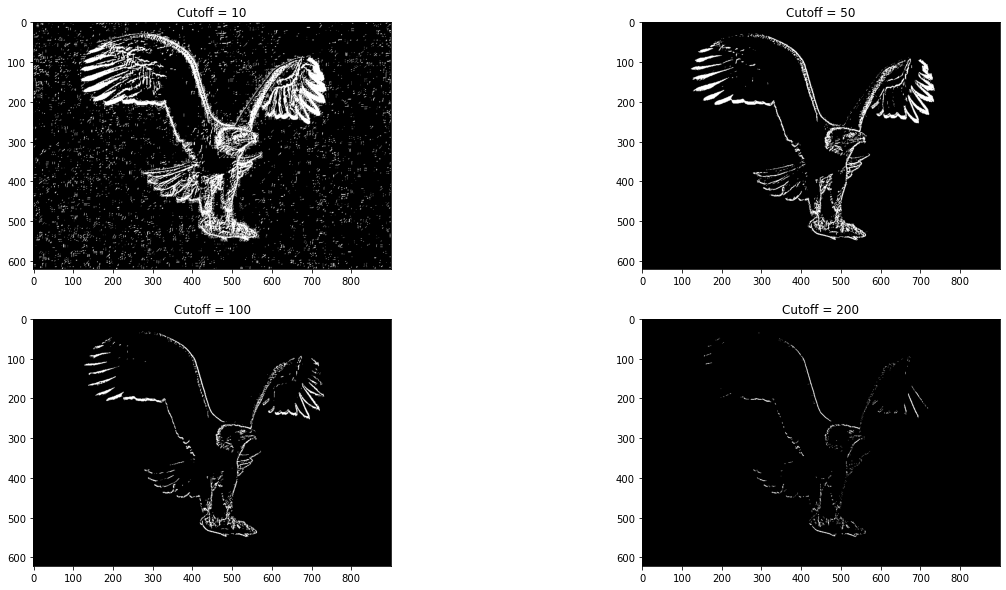

In [4]:
# Showing different thresholds
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 

ax1.imshow(f>10,cmap='gray')
ax2.imshow(f>50, cmap='gray')
ax3.imshow(f>100,cmap='gray')
ax4.imshow(f>200,cmap='gray')

ax1.title.set_text('Cutoff = 10')
ax2.title.set_text('Cutoff = 50')
ax3.title.set_text('Cutoff = 100')
ax4.title.set_text('Cutoff = 200')

**b) Compute the first partial derivatives of the image in the 𝑥 and 𝑦 directions using Prewitt operator. Using these derivatives, compute the gradient magnitude of the image. Show how thresholding can affect the gradient image.**

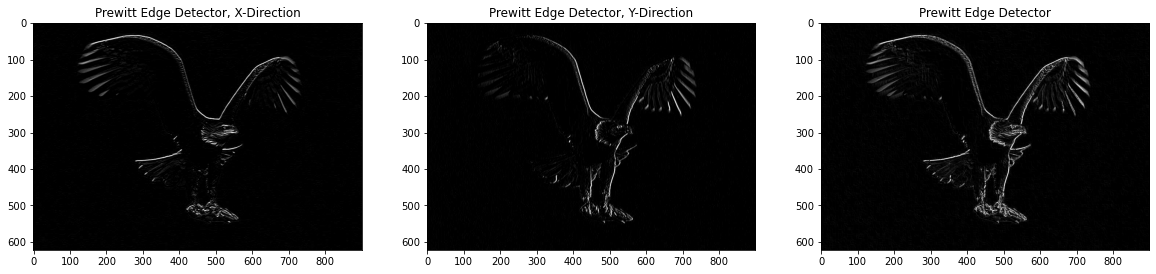

In [5]:
fig = plt.figure(figsize=(20,20), frameon=False)
ax1 = fig.add_subplot(131)  
ax2 = fig.add_subplot(132)  
ax3 = fig.add_subplot(133)  

m,n = img_gray.shape
x_mask_p = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
y_mask_p = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

fx_p = cv2.filter2D(img_gray, -1, x_mask_p).astype(np.uint8)
fy_p = cv2.filter2D(img_gray, -1, y_mask_p).astype(np.uint8)
f_p = (fx_p+fy_p).astype(np.uint8)

ax1.imshow(fx_p,cmap='gray')
ax2.imshow(fy_p, cmap='gray')
ax3.imshow(f_p,cmap='gray')

ax1.title.set_text('Prewitt Edge Detector, X-Direction')
ax2.title.set_text('Prewitt Edge Detector, Y-Direction')
ax3.title.set_text('Prewitt Edge Detector')

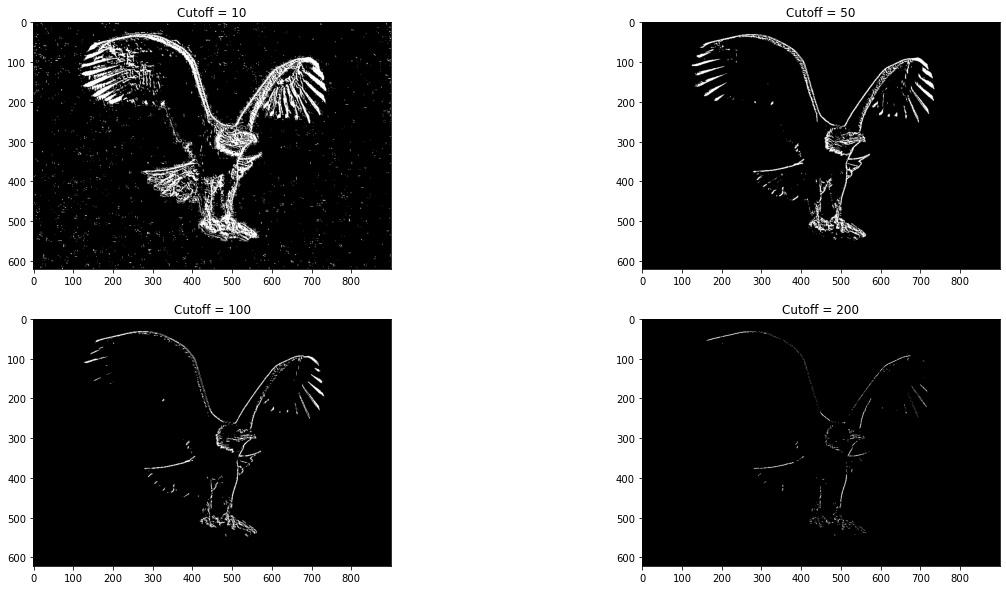

In [6]:
# Showing different thresholds
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 

ax1.imshow(f_p>10,cmap='gray')
ax2.imshow(f_p>50, cmap='gray')
ax3.imshow(f_p>100,cmap='gray')
ax4.imshow(f_p>200,cmap='gray')

ax1.title.set_text('Cutoff = 10')
ax2.title.set_text('Cutoff = 50')
ax3.title.set_text('Cutoff = 100')
ax4.title.set_text('Cutoff = 200')

**c) Detect edges using Laplacian of Gaussian (LoG). Compute $\nabla^2G$ for $G(x,y)=\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}$. Construct a 5x5 LoG kernel and convolve it with the image.**  
$\frac{\partial ^2G(x,y)}{\partial x^2} = \frac{1}{2\pi}(x^2-1)e^{-\frac{x^2+y^2}{2}}$, $\frac{\partial ^2G(x,y)}{\partial y^2} = \frac{1}{2\pi}(y^2-1)e^{-\frac{x^2+y^2}{2}}$  
$\nabla^2G = \frac{\partial ^2G(x,y)}{\partial x^2} + \frac{\partial ^2G(x,y)}{\partial y^2} = \frac{1}{2\pi}(x^2-1)e^{-\frac{x^2+y^2}{2}} + \frac{1}{2\pi}(y^2-1)e^{-\frac{x^2+y^2}{2}} = \frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}[(x^2-1)+(y^2-1)]$

In [7]:
def gradient(x,y): # Assumes sigma = 1
    return (1/(2*math.pi))*((x**2-1)+(y**2-1))*math.exp(-(x**2+y**2)/2)

In [8]:
def log_filter(size):
    matrix = [[0] * size for i in range(size)]
    vals = [-2,-1,0,1,2]
    for i in range(size):
        for j in range(size):
            row=vals[i]
            col=vals[j]
            matrix[i][j] = gradient(vals[i], vals[j])
    return np.array(matrix)

In [9]:
# Create kernel matrix and scale so that it sums to 0
log_kernel = log_filter(5)
log_kernel_disc = log_kernel - log_kernel.sum()/25

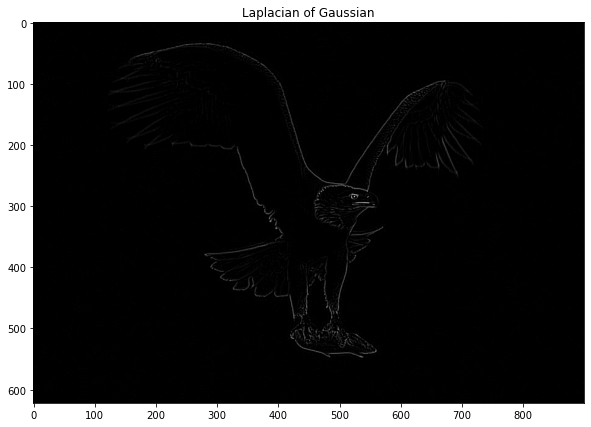

In [10]:
result = cv2.filter2D(img_gray, -1, log_kernel_disc)
fig = plt.figure(figsize=(14,7), frameon=False)
ax1 = fig.add_subplot(111)  

ax1.imshow(result,cmap='gray')
ax1.title.set_text('Laplacian of Gaussian')

**d)  Detect edges using extended Difference of Gaussians (DoG) operator. DoG is a bandpass filter that attenuates all frequencies between the cut-off frequencies of the two Gaussians.**

In [11]:
# Set parameters
k=1.6
eps=-0.1
gamma=0.98
phi=200
sigma=0.8

In [12]:
def T(u):
    if u >= eps:
        return 1
    else:
        return 1+np.tanh(phi*(u-eps))
    
T_vec = np.vectorize(T)

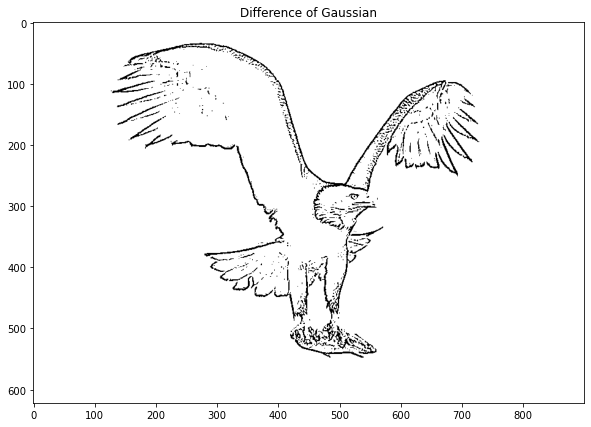

In [13]:
img_gray = color.rgb2gray(img).astype(np.float64)
low_gauss = cv2.GaussianBlur(img_gray, ksize = (7,7), sigmaX=sigma, borderType=cv2.BORDER_REPLICATE)
high_gauss = cv2.GaussianBlur(img_gray, ksize = (7,7), sigmaX=k*sigma, borderType=cv2.BORDER_REPLICATE)
dog = low_gauss - gamma*high_gauss
img_dog = 2.*(dog - np.min(dog))/np.ptp(dog)-1

result_T = T_vec(img_dog).astype(np.uint8)

fig = plt.figure(figsize=(14,7), frameon=False)
ax1 = fig.add_subplot(111)  

ax1.imshow(result_T,cmap='gray')
ax1.title.set_text('Difference of Gaussian')